In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from icecream import ic

plt.rc('text', usetex=True)
plt.rc('font', family='STIXGeneral')

# Coincidence gamma spectroscopy
## Sodium $e^+e^- $ annihilation (511keV - 511keV)

Values TOTALSUM and REALTIME taken from 'Results/4.1.4/*.mcd' files

In [2]:
ic(24/123.136)
ic(59/123.155)
ic(84/129.882)
ic(48/122.609)

ic| 24/123.136: 0.1949064449064449
ic| 59/123.155: 0.47907108927773945
ic| 84/129.882: 0.6467408878828474
ic| 48/122.609: 0.3914883899224364


0.3914883899224364

deflection| sum | time | count rate
:-   |-|-|:-
0cm  | 24 | 123.136s | 0.1949064449064449 $s^{-1}$
-1cm | 59 | 123.155s | 0.47907108927773945 $s^{-1}$
-2cm | 84 | 129.882s | 0.6467408878828474 $s^{-1}$
-3cm | 48 | 122.609s | 0.3914883899224364 $s^{-1}$

Maximal count rate at a deflection of -2cm.

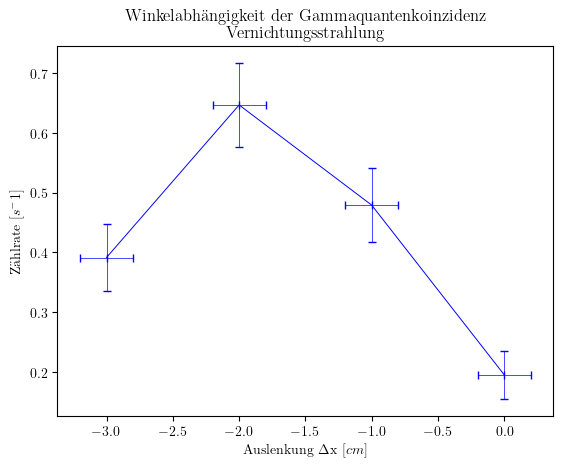

In [12]:
count_rate = [48/122.609, 84/129.882, 59/123.155,24/123.136]
deflection = [-3,-2,-1,0]

x_error_points = [-3,-2,-1,0]
y_error_points = [48/122.609, 84/129.882, 59/123.155,24/123.136]
x_errors = [0.2,0.2,0.2,0.2]
y_errors = [np.sqrt(48)/122.609, np.sqrt(84)/129.882, np.sqrt(59)/123.155,np.sqrt(24)/123.136]
    
fig, ax = plt.subplots()
ax.plot(deflection, count_rate, 'b', linewidth=.7)
ax.set_title('Winkelabhängigkeit der Gammaquantenkoinzidenz \n Vernichtungsstrahlung')
ax.errorbar(x_error_points, y_error_points, xerr=x_errors, yerr=y_errors, fmt='|', capsize=3, color='b',linewidth=.5, label='Fehler')
ax.set(xlabel=f'Auslenkung $\\Delta$x [$cm$]', ylabel=f' Zählrate [$s^{-1}$] ')
# ax.legend()
plt.savefig("plots/Koinzidenzplot Vernichtungsstrahlung.pdf")
plt.show()

## Sodium $e^+e^- $ annihilation and $\gamma$-decay (511keV - 1275keV)

ic| 1158/422.627: 2.740004779628372
ic| 1212/421.342: 2.876523109493001
ic| 1150/421.441: 2.7287330848208886


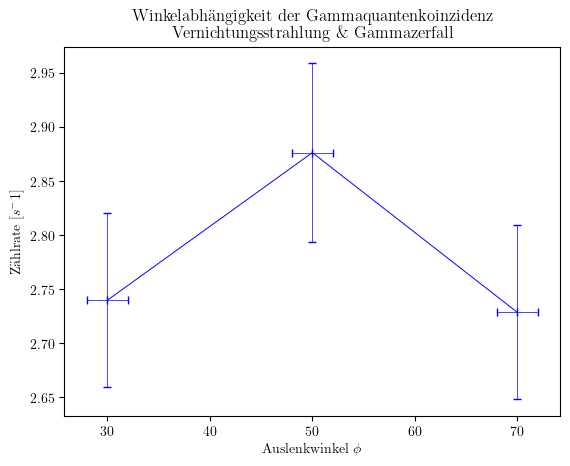

In [21]:
ic(1158/422.627) # 30 degrees
ic(1212/421.342) # 50 degrees
ic(1150/421.441) # 70 degrees

count_rate_2 = [1158/422.627 , 1212/421.342, 1150/421.441]
angle_2 = [30,50,70]

x_error_points = [30,50,70]
y_error_points = [1158/422.627 , 1212/421.342, 1150/421.441]
x_errors = [2,2,2]
y_errors = [np.sqrt(1158)/422.627 , np.sqrt(1212)/421.342, np.sqrt(1150)/421.441]

fig, ax = plt.subplots()
ax.plot(angle_2, count_rate_2, 'b', linewidth=.7)
ax.errorbar(x_error_points, y_error_points, xerr=x_errors, yerr=y_errors, fmt='|', capsize=3, color='b',linewidth=.5, label='Fehler')
ax.set_title(f'Winkelabhängigkeit der Gammaquantenkoinzidenz \n Vernichtungsstrahlung $\\&$ Gammazerfall')
ax.set(xlabel=f'Auslenkwinkel $\\phi$', ylabel=f'Zählrate [$s^{-1}$] ')
plt.savefig("plots/Koinzidenzplot Vernichtungsstrahlung Gammazerfall.pdf")
plt.show()

We should actually expect a lower count rate here than at the 511-511 coincidence

## Cobalt decay cascade

## Angular Correlation Function

\begin{align}
    W(\vartheta) &= 1 + A_2P_2(\cos\vartheta) + A_4P_4(\cos\vartheta) \\
    P_2          &= \frac{1}{2}\left(3\cos^2(\vartheta) - 1 \right) \\
    P_4          &= \frac{1}{8}\left(35\cos^4(\vartheta) - 30\cos^2(\vartheta) + 3 \right)
\end{align}
The coefficients $A_2, A_4$ are actually more complicated to compute (equations (2.12) and (2.13) in the manual), but for now we read them from the table of coefficients $F_\nu(I,I',L,L')$. \
This simplified calculation is adopted from the manual page 13.

ic| sweetspot: 53.2812531393647


        2-11    2-12    2-22    4-22    4-23    4-24
I I’                                                
1 0   0.7017     NaN     NaN     NaN     NaN     NaN
  1  -0.3536 -1.0607 -0.3536     NaN     NaN     NaN
  2   0.0707  0.4743  0.3536     NaN     NaN     NaN
2 0      NaN     NaN -0.5976 -1.0690     NaN     NaN
  1  -0.3354 -0.9354 -0.2988  0.7127  0.9960  0.0891
  2  -0.4183 -0.6124  0.1281 -0.3054 -0.7986 -0.1336
  3   0.1195  0.6547  0.3415  0.0764  0.3260  0.0891
  4      NaN     NaN -0.1707 -0.0085 -0.0627 -0.0297
4 2      NaN     NaN -0.4477 -0.3044  0.9004 -0.0484
  3   0.3134 -0.9402 -0.0448  0.6088 -0.3035 -0.1013
  4  -0.4387 -0.3354  0.2646 -0.4981 -0.6139  0.0132


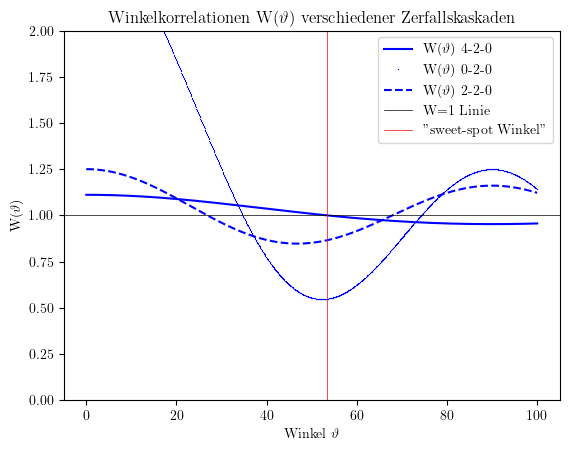

In [5]:
# coefficients F(I,I`,L,L`)
df = pd.read_excel("angularcorrelationcoefficient.ods")
df.set_index(['I','I’'], inplace=True)
print(df)
'''
latex_table = df.to_latex(
    # index=False,  
    caption="Koeffizienten der Winkelverteilungsfunktion",  # The caption to appear above the table in the LaTeX document
    label="tab:angularcorrelationcoefficient",  # A label used for referencing the table within the LaTeX document
    position="ht",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="llrrrrrr",  # The format of the columns: left-aligend first column and center-aligned remaining columns as per APA guidelines
    escape=False,  
    float_format="{:0.4f}".format  
)

print(latex_table)
'''
# angular correlation function
def angular(theta, i0, i1, i2, l1, l2,):
    '''
    theta: angle between the two detectors
    i0: first level of cascade
    i1: second level of cascade
    i2: third level of cascade
        i.e. a cascade of 4-2-0 would have i0=4, i1=2, i2=0
    l1: first transition
    l2: second transition
    
    this function assumes L1 = L2, like in the example in the manual; 
    i suspect this doesnt always have to be the case
    '''
    thetadeg= theta / 180 * np.pi 
    a_nu2_t1 = df.loc[(i1,i0),f'2-{l1}{l1}']
    a_nu2_t2 = df.loc[(i1,i2), f'2-{l2}{l2}']
    a2 = a_nu2_t1 * a_nu2_t2
    p2 = .5 * (3*np.cos(thetadeg)**2 - 1)

    a_nu4_t1 = df.loc[(i1,i0), f'4-{l1}{l1}']
    a_nu4_t2 = df.loc[(i1,i2), f'4-{l2}{l2}']
    a4 = a_nu4_t1 * a_nu4_t2
    p4 = .125 * (35*np.cos(thetadeg)**4 - 30*np.cos(thetadeg)**2 + 3)
    
    return 1 + a2*p2 + a4*p4


'''
for correct calculation of a2 and a4 see manual chapter 2.4.2, for now it isn't implemented because of the missing delta
what is this Mischungsverhältnis delta. we just kinda ignored it
'''
plt.rc('text', usetex=True)
plt.rc('font', family='STIXGeneral')
fig, ax = plt.subplots()
x = np.linspace(0,100,1000)

ax.plot(x,angular(x,4,2,0,2,2), 'b', label=f'W($\\vartheta$) 4-2-0')
ax.plot(x,angular(x,0,2,0,2,2), 'b*', markersize=.3, label=f'W($\\vartheta$) 0-2-0')
ax.plot(x,angular(x,2,2,0,2,2), 'b--', label=f'W($\\vartheta$) 2-2-0')

ax.set_title(f'Winkelkorrelationen W$(\\vartheta)$ verschiedener Zerfallskaskaden')
ax.set(xlabel=f'Winkel $\\vartheta$', ylabel=f'W$(\\vartheta)$')
ax.set_ylim(0, 2) 
ax.axhline(1, linewidth=.5, color='k', label=f'W=1 Linie') # W = 1 line
sweetspot = np.interp(-1,-angular(x,4,2,0,2,2), x) # np.interp works primarily for increasing functions, which is why we invert it
ic(sweetspot)
ax.axvline(sweetspot, linewidth=.5, color='r', label=f'"sweet-spot Winkel"') # angle at which W = 1
ax.legend()
plt.savefig("plots/Winkelkorrelationen.pdf")
plt.show()

So the sweetspot angle doesn't lie exactly at 55 degrees as the plot in the manual shows, but at 53 degrees. Probably because the source of the plot didn't simplify the calculation of the $A_\nu$ coefficients. The plot also did not specify the jumps $L, L'$ for different angular correlations.

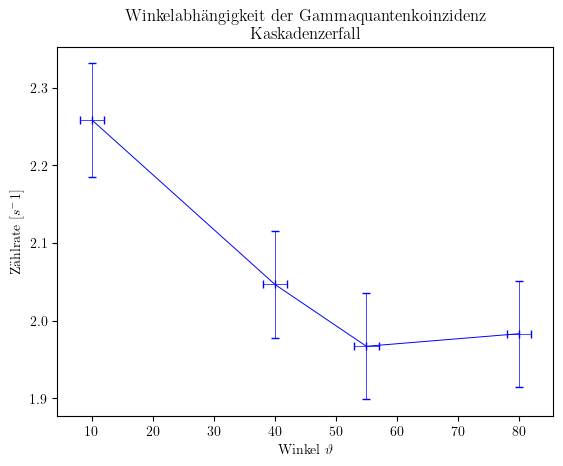

In [40]:
count_rate_3 = [952/421.577, 872/426.045, 830/421.920, 842/424.541]
angle_3 = [10,40,55,80]

# [counter A/1,counter B/2]
counter = [ [128551/421.577,123698/421.577],[132415/426.045,124920/426.045],[130547/421.920,123973/421.920],[132379/424.541,123854/424.541] ]
x_error_points = [10,40,55,80]
y_error_points = [952/421.577, 872/426.045, 830/421.920, 842/424.541]
x_errors = [2,2,2,2]
y_errors = [np.sqrt(952)/421.577, np.sqrt(872)/426.045, np.sqrt(830)/421.920, np.sqrt(842)/424.541]

fig, ax = plt.subplots()
ax.plot(angle_3, count_rate_3, 'b', linewidth=.7)
ax.errorbar(x_error_points, y_error_points, xerr=x_errors, yerr=y_errors, fmt='|', capsize=3, color='b',linewidth=.5, label='Fehler')
ax.set_title(f'Winkelabhängigkeit der Gammaquantenkoinzidenz \n Kaskadenzerfall')
ax.set(xlabel=f'Winkel $\\vartheta$', ylabel=f'Zählrate [$s^{-1}$] ')
# plt.savefig("plots/Koinzidenzplot Vernichtungsstrahlung Kaskadenzerfall.pdf")
plt.show()

In [54]:
index = ["10", "40","55", "80"]
table = pd.DataFrame({f"$Z_{1}$":[128551/421.577, 132415/426.045, 130547/421.920, 132379/424.541],
                      f"$\\sigma_{1}$":[np.sqrt(128551)/421.577, np.sqrt(132415)/426.045, np.sqrt(130547)/421.920, np.sqrt(132379)/424.541],
                       f"$Z_{2}$": [123698/421.577, 124920/426.045, 123973/421.920, 123854/424.541],
                      f"$\\sigma_{2}$":[np.sqrt(123698)/421.577, np.sqrt(124920)/426.045, np.sqrt(123973)/421.920, np.sqrt(123854)/424.541],
                       f"$Z_C$":[952/421.577, 872/426.045, 830/421.920, 842/424.541],
                      f"$\\sigma_C$": [np.sqrt(952)/421.577, np.sqrt(872)/426.045, np.sqrt(830)/421.920, np.sqrt(842)/424.541],
                       f"$W(\\vartheta)$":angular_data,
                     f"$\\sigma_W$":[1,2,0,4]},index=index)
table.index.name = "Winkel"
ic(table)


delta_w = np.sqrt( ( (2*table[f"$Z_C$"]*delta_q) / (table[f"$Z_{1}$"]*table[f"$Z_{2}$"]) )**2 + \
                  ( (2*q_value*table[f"$\\sigma_C$"]) / (table[f"$Z_{1}$"]*table[f"$Z_{2}$"]) )**2 + \
                  ( (2*q_value*table[f"$Z_C$"]*table[f"$\\sigma_{1}$"]) / (table[f"$Z_{1}$"]**2 * table[f"$Z_{2}$"]) )**2 + \
                  ( (2*q_value*table[f"$Z_C$"]*table[f"$\\sigma_{2}$"]) / (table[f"$Z_{1}$"] * table[f"$Z_{2}$"]**2) )**2  )

table[f"$\\sigma_W$"] = delta_w
ic(table)

ic| table:              $Z_1$  $\sigma_1$       $Z_2$  $\sigma_2$     $Z_C$  $\sigma_C$  \
           Winkel                                                                         
           10      304.928874    0.850474  293.417335    0.834266  2.258188    0.073188   
           40      310.800502    0.854109  293.208464    0.829584  2.046732    0.069311   
           55      309.411737    0.856354  293.830584    0.834514  1.967198    0.068282   
           80      311.816762    0.857018  291.736252    0.828963  1.983318    0.068350   
           
                   $W(\vartheta)$  $\sigma_W$  
           Winkel                              
           10            1.166438           1  
           40            1.037979           2  
           55            1.000000           0  
           80            1.007601           4  
ic| table:              $Z_1$  $\sigma_1$       $Z_2$  $\sigma_2$     $Z_C$  $\sigma_C$  \
           Winkel                                              

,$Z_1$,$\sigma_1$,$Z_2$,$\sigma_2$,$Z_C$,$\sigma_C$,$W(\vartheta)$,$\sigma_W$
Winkel,,,,,,,,
10,304.928874,0.850474,293.417335,0.834266,2.258188,0.073188,1.166438,0.055780
40,310.800502,0.854109,293.208464,0.829584,2.046732,0.069311,1.037979,0.050669
55,309.411737,0.856354,293.830584,0.834514,1.967198,0.068282,1.000000,0.049407
80,311.816762,0.857018,291.736252,0.828963,1.983318,0.068350,1.007601,0.049607


ic| q_value: 23107.651354850575
ic| delta_q: 807.2960279917307
ic| angular_data: [1.1664376310598912, 1.0379790770904125, 1.0, 1.0076005567960968]


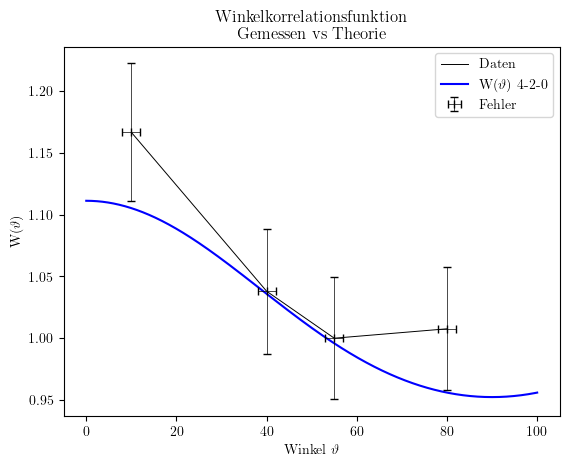

In [55]:
# q value at 55 degrees, where W(theta) is assumed to be 1
z1 = 130547/421.920
z2 = 123973/421.920
z_co = 830/421.920
q_value = (z1 * z2) / (z_co * 2)
delta_q = np.sqrt( ( (z2 * np.sqrt(130547)) / (2 *z_co * 421.920) )**2 + ( (z1 * np.sqrt(123973)) / (2 *z_co*421.920) )**2 + ( (z2 * z1 * np.sqrt(830)) / (2 *z_co**2 * 421.920) )**2 )
ic(q_value)
ic(delta_q)

# angular correlation
angular_data = []
for k in range(4):
    w = 2 * (count_rate_3[k] / (counter[k][0] * counter[k][1])) * q_value
    angular_data.append(w)
ic(angular_data)

x_error_points = [10,40,55,80]
y_error_points = angular_data
x_errors = [2,2,2,2]
y_errors = table[f"$\\sigma_W$"]

x = np.linspace(0,100,1000)
fig, ax = plt.subplots()
ax.plot(angle_3, angular_data, 'k', linewidth=.7, label="Daten")
ax.plot(x,angular(x,4,2,0,2,2), 'b', label=f'W($\\vartheta$) 4-2-0')
ax.errorbar(x_error_points, y_error_points, xerr=x_errors, yerr=y_errors, fmt='|', capsize=3, color='k',linewidth=.5, label='Fehler')
ax.set_title(f'Winkelkorrelationsfunktion \n Gemessen vs Theorie')
ax.set(xlabel=f'Winkel $\\vartheta$', ylabel=f'W$(\\vartheta)$')
plt.legend()
plt.savefig("plots/Winkelkorrelationen Vergleich.pdf")
plt.show()

In [53]:
# for latex
latex_table = table.to_latex(
    # index=False,  
    caption="Messparameter des Kaskadenzerfalls",  # The caption to appear above the table in the LaTeX document
    label="tab:qtable",  # A label used for referencing the table within the LaTeX document
    position="H",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="lrrrrrrrr",  # The format of the columns: left-aligend first column and center-aligned remaining columns as per APA guidelines
    escape=False,  
    float_format="{:0.4f}".format  
)

print(latex_table)

\begin{table}[H]
\caption{Messparameter des Kaskadenzerfalls}
\label{tab:qtable}
\begin{tabular}{lrrrrrrrr}
\toprule
 & $Z_1$ & $\sigma_1$ & $Z_2$ & $\sigma_2$ & $Z_C$ & $\sigma_C$ & $W(\vartheta)$ & $\sigma_W$ \\
Winkel &  &  &  &  &  &  &  &  \\
\midrule
10 & 304.9289 & 0.8505 & 293.4173 & 0.8343 & 2.2582 & 0.0732 & 1.1664 & 0.0558 \\
40 & 310.8005 & 0.8541 & 293.2085 & 0.8296 & 2.0467 & 0.0693 & 1.0380 & 0.0507 \\
55 & 309.4117 & 0.8564 & 293.8306 & 0.8345 & 1.9672 & 0.0683 & 1.0000 & 0.0494 \\
80 & 311.8168 & 0.8570 & 291.7363 & 0.8290 & 1.9833 & 0.0683 & 1.0076 & 0.0496 \\
\bottomrule
\end{tabular}
\end{table}

